# Практическая работа №3: Регрессионный анализ
Выполнил студент гр.1374 Курицина Полина. Вариант 12

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

**Регрессия**

Регрессия имеет вид: $ Y = X\overrightarrow{\beta} + вектор \ ошибок $  
Линейная регрессия имеет вид: $ Y = \beta_0 + X\beta_1$  
Квадратичная регрессия имеет вид: $ Y = \beta_0 + X\beta_1 +  X^2\beta_2$  
$\overrightarrow{\beta} = (XX^T)^{-1}XY$  
$r = rank(X)$, тогда несмещенна оценка дисперсии $s^2 = \frac{(Y - X^T\beta)^T(Y - X^T\beta)}{n-r}$  
Вектор ошибок - разница между значением Y и значением модели регрессии ($X^T\beta$)  

**МНК**  
Основная идея МНК - минимизация векторая ошибок регресионных моделей
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

Нормальные уравнения: $XX^{\intercal}\beta=XY$

Решение системы нормальных уравнений: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$


Несмещённая **оценка дисперсии** $(s^{2})$

$r = rank(X)$, тогда несмещенна оценка дисперсии $s^2 = \frac{(Y - X^T\beta)^T(Y - X^T\beta)}{n-r}$  

**Доверительный интервал**  
$\psi = C^T \beta  \\
\frac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} \\
x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} \\
b_\psi = C^T (XX^T)^{-1}C \\
 P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

Искомый интервал: $ [\widehat \psi - x_{\alpha}s\sqrt{b} ; \widehat \psi + x_{\alpha}s\sqrt{b}] $

**Уравнение доверительного эллипсоида**  
$A_{\alpha}=\left\{ \overrightarrow{X}:(\overrightarrow{X}-\widehat{\psi})^{\intercal}B^{-1}(\overrightarrow{X}-\widehat{\psi})\le qS^{2}X_{\alpha} \right\}$



**F-критерий**

$F=\frac{MSR}{MSE} \\ MSR - среднеквадратичное \ отклонение \ отклонение \\ MSE -  среднеквадратичное \ отклонение\  ошибки $  

Высчитывается критическиое значение -  квантиль распределения Фишера с заданными степенями свободы для заданного уровня доверия

Если F превосходит найденный квантиль, то зависимость есть, иначе нет.

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y
 от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить метод наименьшего квадрата оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.  Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки


Линейная регрессионная модель переменной Y по переменной X формулируется следующим образом:

$Y = \beta_0 + \beta_1X + \varepsilon,$

где $\beta_0$ - сдвиг, $\beta_1$ - масштаб, а $\varepsilon$ - случайная ошибка.

Для получения оценок параметров сдвига и масштаба используется метод наименьших квадратов. Оценки параметров $\hat{\beta_0}$ и $\hat{\beta_1}$ вычисляются следующим образом:

В регрессионной модели с двумя параметрами $Y_i = \beta_0 + \beta_1X_i + \varepsilon,$  имеем нормальные уравнения: $\sum_{i=1}^{n}({Y_i}-\beta_0-\beta_1X_i)=0$ и $\sum_{i=1}^{n}(X_i{Y_i}-\beta_0-\beta_1X_i)=0$

Так как не все $X_i$ одинаковы, то решение имеют вид:

$\hat{\beta_1} = \frac{\sum(X-\overline{X})(Y-\overline{Y})}{\sum(X-\overline{X})^2},$

$\hat{\beta_0} = \overline{Y} - \hat{\beta_1}\overline{X},$

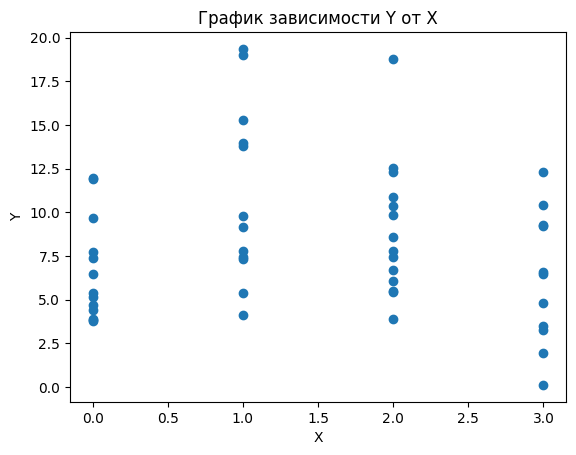

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sst

Y = np.array([6.04, 10.41, 5.39, 9.68, 5.18, 8.58, 9.81, 11.89, 9.87, 12.51, 7.32, 13.97, 3.83, 3.87, 12.33, 7.72, 6.47, 7.79, 19.35, 6.59, 7.40, 6.69, 6.46, 3.47, 9.16, 9.27, 11.99, 10.36, 15.29, 5.46, 13.78, 9.20, 18.77, 5.37, 5.48, 12.31, 0.12, 3.27, 10.86, 7.80, 7.45, 3.77, 3.91, 4.40, 1.94, 4.13, 4.82, 7.45, 18.99, 4.71])
X = np.array([2, 3, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 3, 0, 3, 1, 1, 3, 0, 2, 0, 3, 1, 3, 0, 2, 1, 2, 1, 3, 2, 0, 2, 2, 3, 3, 2, 2, 2, 0, 0, 0, 3, 1, 3, 1, 1, 0]).reshape(-1, 1)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("График зависимости Y от X")
plt.show()

In [102]:
x1 = np.array('''2 3 1 0 0 2 1 0 2 2 1 1 0 2 3 0 3 1 1 3 0 2 0 3 1 3 0 2 1 2 1 3 2 0 2 2 3 3 2 2 2 0 0 0 3 1 3 1 1 0'''.split(), dtype=np.float).reshape(-1, 1)
x1 = np.concatenate([x1, np.ones(x1.shape)], axis=1)
x_str= '2 3 1 0 0 2 1 0 2 2 1 1 0 2 3 0 3 1 1 3 0 2 0 3 1 3 0 2 1 2 1 3 2 0 2 2 3 3 2 2 2 0 0 0 3 1 3 1 1 0'.split()
x2  = np.array([ [1 for i in range(50)], [int(val) for val in x_str] ])
x3  = np.array([ [1 for i in range(50)], [int(val) for val in x_str], [int(val)**2 for val in x_str] ])

<ipython-input-102-de359fe85172>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x1 = np.array('''2 3 1 0 0 2 1 0 2 2 1 1 0 2 3 0 3 1 1 3 0 2 0 3 1 3 0 2 1 2 1 3 2 0 2 2 3 3 2 2 2 0 0 0 3 1 3 1 1 0'''.split(), dtype=np.float).reshape(-1, 1)


β1 = 9.996049741742557e-16
β0 = 8.253599999999999


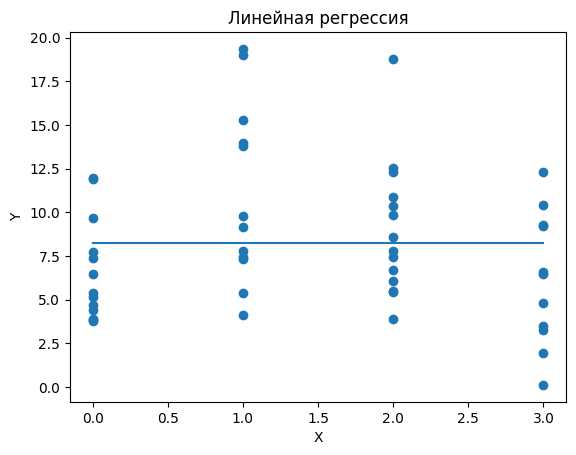

In [54]:
Xmean = np.mean(X)
Ymean = np.mean(Y)

# Вычисляем оценки параметров сдвига и масштаба
beta_1 = np.sum((X - Xmean) * (Y - Ymean)) / np.sum((X - Xmean) ** 2)
beta_0 = Ymean - beta_1 * Xmean
beta_list=np.array([beta_1, beta_0])
print("β1 =",beta_1)
print("β0 =",beta_0)

# Построение линии регрессии
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [beta_0 + beta_1 * min(X), beta_0 + beta_1 * max(X)])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия")
plt.show()

### 2.Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости по $\chi^{2}$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещенная оценка дисперсии: 18.676770448979592


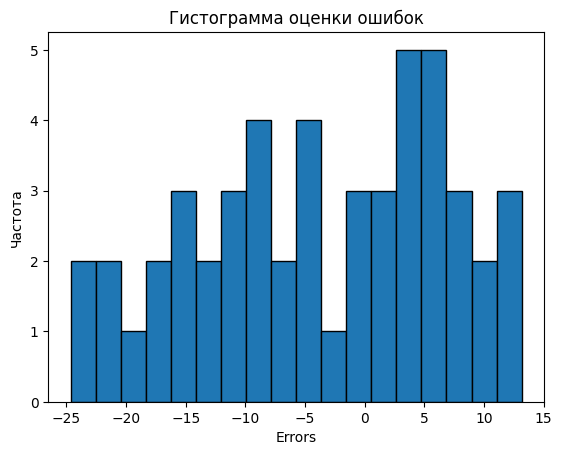

Статистика хи-квадрат 8.32
Критическое значение хи-квадрат 30.99504720616068
Ошибки могут иметь нормальное распределение (не отвергать нулевую гипотезу).
Статистика Колмогорова: 0.9594622625781702
p-значение: 4.943166728964115e-70
Оценка не соответствует нормальному распределению.


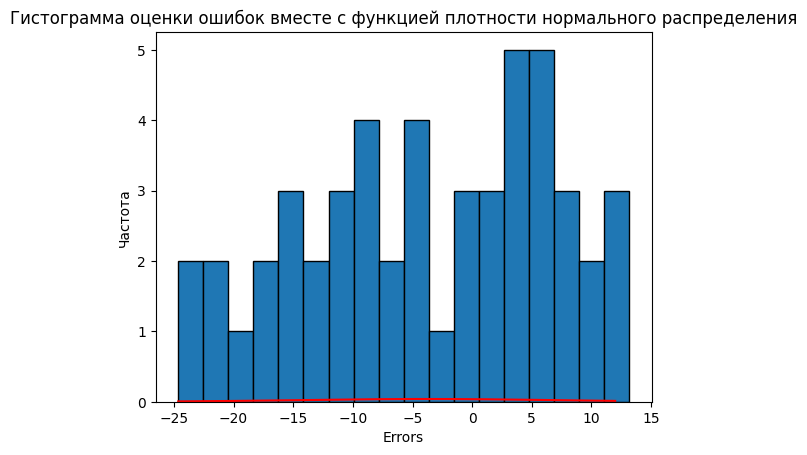

In [98]:
from scipy.stats import chisquare, kstest, norm, chi2, stats, t
n = len(Y)
s_2 = np.sum((Y - Ymean)**2) / (n - 1)

print("Несмещенная оценка дисперсии:", s_2)


h = 2.1

errors = Y - np.dot(x2.T, beta_list)

bins_list = np.arange(min(errors), max(errors) + h, h)
hist = plt.hist(errors, bins=bins_list, edgecolor='black')[0]

plt.xlabel('Errors')
plt.ylabel('Частота')
plt.title('Гистограмма оценки ошибок')
plt.show()

#Проверим гипотезу нормальности ошибок на уровне значимости 0.02 с помощью критерия хи-квадрат:
obs_freq, bin_edges = np.histogram(errors, bins=bins_list) #вычисляем наблюдаемые частоты
exp_freq = n * np.diff(bin_edges) / np.sum(np.diff(bin_edges)) #вычисляем ожидаемые частоты
chi2_stat = np.sum((obs_freq - exp_freq)**2 / exp_freq) #вычисление значения статистики критерия хи-квадрат
# Вычисляем критическое значение хи-квадрат
chi2_crit = chi2.ppf(0.98, df=len(obs_freq) - 1)
print("Статистика хи-квадрат",chi2_stat)
print("Критическое значение хи-квадрат",chi2_crit)

if chi2_stat > chi2_crit:
    print('Ошибки не подчиняются нормальному распределению (отклонить нулевую гипотезу)')
else:
    print('Ошибки могут иметь нормальное распределение (не отвергать нулевую гипотезу).')

#Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову:
ks, crit_value = kstest(Y, 'norm')
print("Статистика Колмогорова:", ks)
print("p-значение:", crit_value)
alpha = 0.02
if crit_value < alpha:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")

#Визуально оценим данное растояние:
plt.hist(errors, bins=bins_list, edgecolor='black')
plt.xlabel('Errors')
plt.ylabel('Частота')
plt.title('Гистограмма оценки ошибок вместе с функцией плотности нормального распределения')
x = np.linspace(min(errors), max(errors), 1000)
plt.plot(x, norm.pdf(x, np.mean(errors), np.std(errors)), 'r')
plt.show()

### 3.В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$.Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

In [56]:
# Считаем доверительные интервалы по алгоритму
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[1], [0]])
psi = np.dot(C.T, beta_list)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {beta_0 - x_alpha * (s_2 * psi) ** 0.5}")
print(f"right = {beta_0 + x_alpha * (s_2 * psi) ** 0.5}")

x_alpha = 2.3646058614359737
left = 8.253599676909745
right = 8.253600323090252


In [57]:
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alpha / 2, df=n - r)
C = np.matrix([[0], [1]])
psi = np.dot(C.T, beta_list)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {beta_1 - x_alpha * (s_2 * psi) ** 0.5}")
print(f"right = {beta_1 + x_alpha * (s_2 * psi) ** 0.5}")

x_alpha = 2.3646058614359737
left = -29.35833089530301
right = 29.35833089530301


In [58]:
C = np.array([[1, 0],
              [0, 1]
              ])
B = C.T @ np.linalg.inv(x1.T @ x1) @ C
B_inv = np.linalg.inv(B)
q = len(beta_list)
x_alpha = sst.f.ppf(1-alpha, dfn=q, dfd=n - r)
cov = B_inv
polvalues, _ = np.linalg.eig(cov)
np.sqrt(1 / polvalues * (x_alpha * q * s_2))

array([0.86751372, 3.18900936])

### 4.Сформулировать гипотезу независимой переменной Y от переменной X. Провести проверку зависимости.

In [59]:
beta_1_h = np.mean(Y) # наивный прогноз
beta_0_h = 0
SSH = np.sum((beta_1_h - Y) ** 2) - s_2 * (x.shape[0] - np.linalg.matrix_rank(x))

F_stat = (SSH / q) / (s_2)
print(f"Статистика F = {F_stat}")
print(f"x_alpha = {sst.f.ppf(1 - alpha, dfn=q, dfd=n - r)}")

Статистика F = -25.0
x_alpha = 4.070762170893494


$\mathbb{F} < x_{\alpha}$ => гипотеза о независимости принимается

### 5.Сформулировать модель включающую доплнительный член с $X^2$.Построить МНК оценки параметров $\beta_0,\beta_1,\beta_2$ в данной модели. Изобразить графически полученную регрессионную модель.

Линейная регрессионная модель переменной Y по переменной X формулируется следующим образом:

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \varepsilon,$

где $\beta_0,\beta_1,\beta_2$ - параметры, а $\varepsilon$ - случайная ошибка.


Оценки параметров:
β0 =  6.916690670507284
β1 =  5.0048935829732795
β2 =  -1.7874955992958887


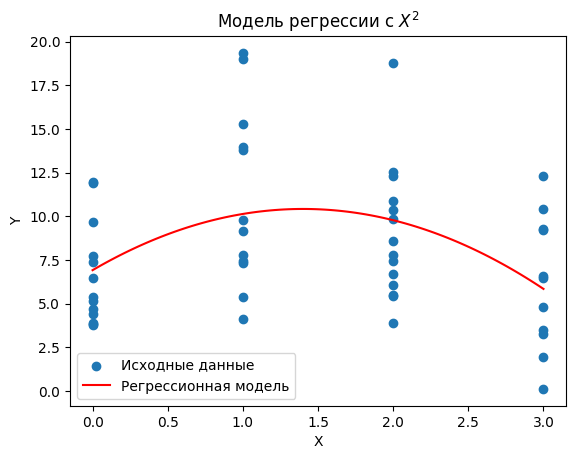

In [101]:
Y = np.array([6.04, 10.41, 5.39, 9.68, 5.18, 8.58, 9.81, 11.89, 9.87, 12.51, 7.32, 13.97, 3.83, 3.87, 12.33, 7.72, 6.47, 7.79, 19.35, 6.59, 7.40, 6.69, 6.46, 3.47, 9.16, 9.27, 11.99, 10.36, 15.29, 5.46, 13.78, 9.20, 18.77, 5.37, 5.48, 12.31, 0.12, 3.27, 10.86, 7.80, 7.45, 3.77, 3.91, 4.40, 1.94, 4.13, 4.82, 7.45, 18.99, 4.71])
X = np.array([2, 3, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 3, 0, 3, 1, 1, 3, 0, 2, 0, 3, 1, 3, 0, 2, 1, 2, 1, 3, 2, 0, 2, 2, 3, 3, 2, 2, 2, 0, 0, 0, 3, 1, 3, 1, 1, 0]).reshape(-1, 1)

X_2 = X ** 2
X_stacked = np.column_stack((np.ones_like(X), X, X_2))

# Используем метод наименьших квадратов для нахождения оценок параметров
beta = np.linalg.lstsq(X_stacked, Y, rcond=None)[0]

beta_0 = beta[0]
beta_1 = beta[1]
beta_2 = beta[2]
beta_list2=np.array([beta_0, beta_1, beta_2])
print("Оценки параметров:")
print("β0 = ",beta_0)
print("β1 = ",beta_1)
print("β2 = ",beta_2)

x = np.linspace(min(X), max(X), 100)
y = beta_0 + beta_1 * x + beta_2 * x ** 2

plt.scatter(X, Y, label='Исходные данные')
plt.plot(x, y, 'r', label='Регрессионная модель')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Модель регрессии с $X^2$')
plt.legend()
plt.show()

### 6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещенная оценка дисперсии: 18.676770448979592


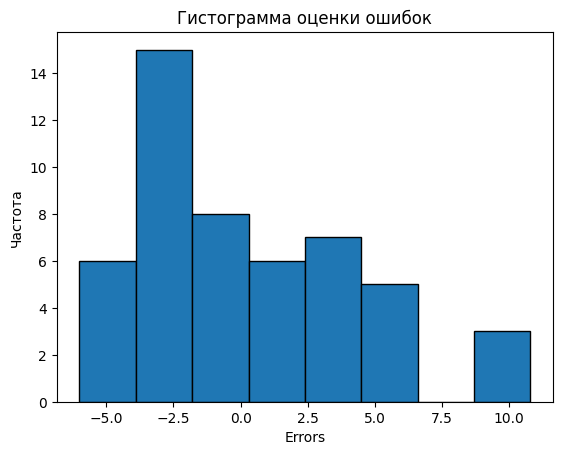

Статистика хи-квадрат: 21.040000000000006
Критическое значение хи-квадрат: 16.622421871110873
Ошибки не подчиняются нормальному распределению (отвергнуть нулевую гипотезу)
Статистика Колмогорова-Смирнова: 0.39903107307548696
p-значение: 1.072858671602755e-07
Ошибки не соответствуют нормальному распределению


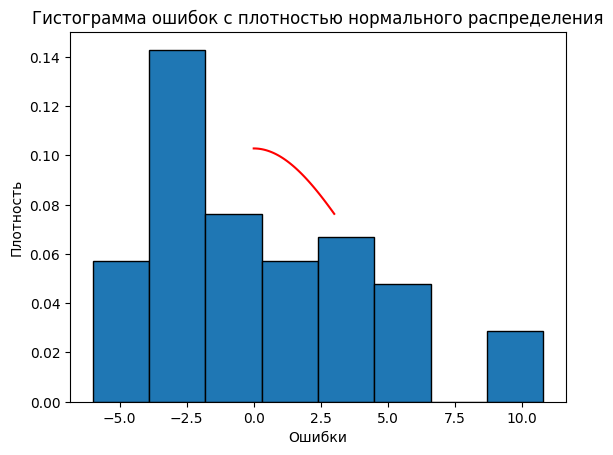

In [131]:
from scipy.stats import chisquare, kstest, norm, chi2
n = len(Y)
s_2 = np.sum((Y - Ymean)**2) / (n - 1)

print("Несмещенная оценка дисперсии:", s_2)
predicted_Y = beta_0 + beta_1 * X + beta_2 * X ** 2

errors = Y - np.dot(x3.T, beta_list2)
h=2.1
bins_list = np.arange(min(errors), max(errors) + h, h)
hist = plt.hist(errors, bins=bins_list, edgecolor='black')[0]

plt.xlabel('Errors')
plt.ylabel('Частота')
plt.title('Гистограмма оценки ошибок')
plt.show()
# Проверка гипотезы о нормальности ошибок с использованием критерия хи-квадрат
observed_frequencies, bin_edges = np.histogram(errors, bins=np.arange(min(errors), max(errors) + h, h))
expected_frequencies = n * np.diff(bin_edges) / np.sum(np.diff(bin_edges))
chi2_statistic, _ = chisquare(observed_frequencies, expected_frequencies)

# Вычисление критического значения хи-квадрат
chi2_critical_value = chi2.ppf(0.98, df=len(observed_frequencies) - 1)

print("Статистика хи-квадрат:", chi2_statistic)
print("Критическое значение хи-квадрат:", chi2_critical_value)

if chi2_statistic > chi2_critical_value:
    print('Ошибки не подчиняются нормальному распределению (отвергнуть нулевую гипотезу)')
else:
    print('Ошибки могут иметь нормальное распределение (не отвергать нулевую гипотезу)')

# Оценка расстояния оценок до нормального распределения по критерию Колмогорова-Смирнова
ks_statistic, ks_p_value = kstest(errors, 'norm')

print("Статистика Колмогорова-Смирнова:", ks_statistic)
print("p-значение:", ks_p_value)

if ks_p_value < alpha:
    print("Ошибки не соответствуют нормальному распределению")
else:
    print("Ошибки соответствуют нормальному распределению")

# Визуализация ошибок и плотности нормального распределения
plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h), edgecolor='black', density=True)
plt.plot(x, norm.pdf(x, np.mean(errors), np.std(errors)), 'r')
plt.xlabel('Ошибки')
plt.ylabel('Плотность')
plt.title('Гистограмма ошибок с плотностью нормального распределения')
plt.show()

### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

In [132]:
alpha = 0.02
n = len(X)


mse = np.sum(errors ** 2) / (n - 3)
cov_matrix = mse * np.linalg.inv(X_stacked.T @ X_stacked)
std_errors = np.sqrt(np.diag(cov_matrix))

t_value = t.ppf(1 - alpha/2, n - 3)


confidence_intervals = np.column_stack((beta - t_value * std_errors, beta + t_value * std_errors))

print("Доверительные интервалы:")
print(f"β0: [{confidence_intervals[0, 0]}, {confidence_intervals[0, 1]}]")
print(f"β1: [{confidence_intervals[1, 0]}, {confidence_intervals[1, 1]}]")
print(f"β2: [{confidence_intervals[2, 0]}, {confidence_intervals[2, 1]}]")

F_value = f.ppf(1 - alpha, 3, n - 3)


semi_axes = np.sqrt(F_value) * np.sqrt(np.diag(cov_matrix))

print("Уравнение доверительного эллипсоида:")
print(f"(({beta[1]} - x1) / {semi_axes[1]})**2 + (({beta[2]} - x2) / {semi_axes[2]})**2 <= 1")

Доверительные интервалы:
β0: [4.309556469306969, 9.5238248717076]
β1: [0.8051309644637703, 9.204656201482788]
β2: [-3.1557757557357453, -0.41921544285603196]
Уравнение доверительного эллипсоида:
((5.0048935829732795 - x1) / 3.3115221026102617)**2 + ((-1.7874955992958887 - x2) / 1.0788919260921683)**2 <= 1


### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.


Гипотеза линейной регрессионной зависимости переменной Y от переменной X может быть сформулирована следующим образом:

H0: $\beta_1 = \beta_2 = 0$ (нет линейной зависимости между Y и X)

H1: Хотя бы один из коэффициентов $\beta_1, \beta_2$ не равен нулю (существует линейная зависимость между Y и X)

In [133]:
# Выводим сумму квадратов остатков, оставшуюся после работы модели
SSR = np.sum((beta_0 + beta_1 * X + beta_2 * X ** 2 - np.mean(Y)) ** 2)
# Выводим сумму квадратов отклонений, объясненную с помощью модели
SSE = np.sum((Y - (beta_0 + beta_1 * X + beta_2 * X ** 2)) ** 2)
p = 3
# Выводим общую сумму квадратов отклонений
SST = SSE + SSR
MSE = SSE / (n - p)  # среднеквадратичное отклонение остатков
MSR = SSR / p  # среднеквадратичное отклонение объясненных отклонений
F = MSR / MSE  # вычисляем значение F-критерия

alpha = 0.02

F_critical = f.ppf(1 - alpha, p, n - p)  # критическое значение F-критерия

print("F =",F)
print("Критическое значение =", F_critical)
# Проверка значимости гипотезы
if F_critical < 0.02:
    print("Гипотеза линейной регрессионной зависимости переменной Y от переменной X значима на уровне 0.02.")
else:
    print("Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне 0.02.")

F = 0.047126721917224855
Критическое значение = 3.6061455215960643
Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне 0.02.


## Выводы

В ходе выполнения лабораторной работы были получены теоретические знания о методе наименьших квадратов, а также практические навыки работы с МНК, функцией регрессии и регрессионным анализом.  
Был исследованы методы регрессионного анализа, такие как построение линейной и квадратичной регрессионных моеделей. Проведен анализ нормальности ошибок, построение доверительных интервалов и эллипсов. Кроме того, оценено расстояние до нормального распределения с использованием критерия Колмогорова и проверена гипотеза о зависимость переменных Y и X.  
Рассмотрены несмещённая оценка дисперсии $s^{2}$ и критерий $\chi^2$ для проверки гипотез. Все эти элементы позволяют проводить статистические выводы о параметрах модели и их значимости.